<a href="https://colab.research.google.com/github/Saikabilane/TimeCrafters2_0/blob/main/supreme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# ***Import Data***

In [ ]:
%cd /content/drive/MyDrive/time


/content/drive/MyDrive/time


In [ ]:
import tt

def conv(vvvv):
    vvvv=list(set(vvvv))
    vvvv.remove('free')
    colorz ={}
    clrz={}
    colorz[0]='Free Period'
    for i in range(len(vvvv)):
        colorz[255 - i]=vvvv[i]
        clrz[vvvv[i]]=255-i
    return colorz,clrz

sch=tt.genetic_algorithm()

k=[]
for i in sch.values():
  for j in i:
    k.append(j)

p=[]
for i in k:
  if i=="free":
    p.append(i)
  else:
    if len(i)==2:
      p.extend(i)
    else:
      p.extend(i[2])
      p.append(i[0])
for i,j in enumerate(p):
  if j=="free":
    continue
  if len(j)==1:
    p[i]=j[0]
  else:
    p[i]=j

t=conv(p)
facvalz = t[0]
colrvalz = t[1]

In [ ]:
colrvalz['S65']

139

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

def show(img):
    cv2_imshow(img)

def read(img):
    image = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    return image

def display(image):
    plt.imshow(image)
    plt.show()

In [ ]:
import numpy as np
import cv2
import random

height, width = 15, 40

def genImage(schedule=sch):
  r=[[0 for y in range(40)] for x in range(15)]
  g=[[0 for y in range(40)] for x in range(15)]
  b=[[0 for y in range(40)] for x in range(15)]
  a=[[0 for y in range(40)] for x in range(15)]
  for ind, row in schedule.items():
    i = list(sch.keys()).index(ind)
    for j, entry in enumerate(row):
        #print(entry)
        if  entry == 'free':  # Free space
            continue
        elif len(entry)==3:  # Lab class
            course_code, staff_codes = entry[0],list(entry[2])
            x1,x2=staff_codes[0][0],staff_codes[1][0]

            r[i][j]=colrvalz[x1]  # Red channel (staff code 1)
            b[i][j]=colrvalz[course_code]    # Blue channel (course code)
            a[i][j]=colrvalz[x2]   # Alpha channel (staff code 2)

        else:  # Theory class
            course_code, staff_code = entry

            g[i][j]=colrvalz[course_code]  # Red channel
            r[i][j]=colrvalz[staff_code]   # Green channel

  r = np.array(r)
  g = np.array(g)
  b = np.array(b)
  a = np.array(a)
  image = np.stack((r,g,b,a),axis=-1)
  cv2.imwrite('out.png',image)
  return image
  print(f'out.png is saved in the current folder also returned as np.array')


def vis(img):
  r=img[:,:,0]
  g=img[:,:,1]
  b=img[:,:,2]
  a=np.array([[255 for x in range(40)] for j in range(15)])

  v=np.stack((r,g,b,a),axis=-1)
  display(v)

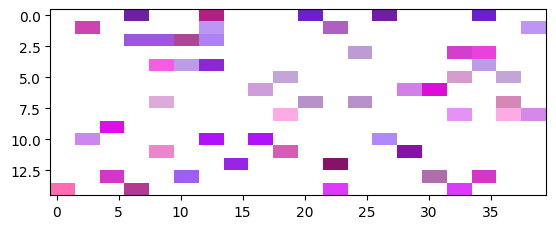

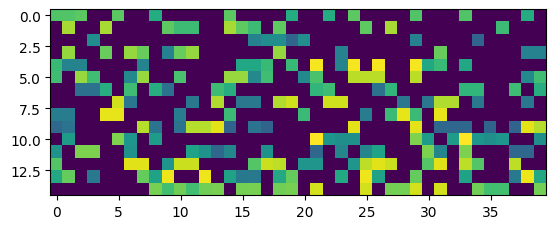

In [ ]:
k=genImage()
display(k)
display(k[:,:,1])

In [ ]:
def give_blues(image,row):
    cols = image.shape[1]
    blue_indices = [col for col in range(cols) if image[row, col, 2] != 0]
    print(blue_indices)
def correct(image,row,col1,col2):
    # Swap the pixels at the selected indices
    if image[row,col2,2]!=0:
      print("Warning ! -- Lab is already there ..")
    else:
      image[row, col1, :], image[row, col2, :] = image[row, col2, :], image[row, col1, :]
      image[row, col1+1, :], image[row, col2+1, :] = image[row, col2+1, :], image[row, col1+1, :]
    display(image)
    '''return image'''

In [ ]:
give_blues(k)

TypeError: give_blues() missing 1 required positional argument: 'row'

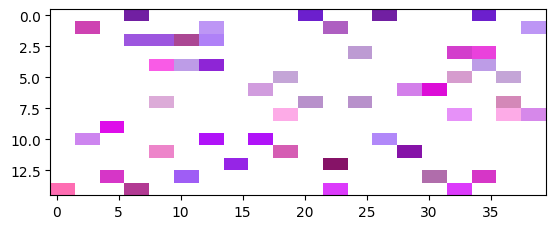

In [ ]:
correct(k,0,12,32)

In [ ]:
# Randomizer Functions

def shuffl(image):
    rows, cols, channels = image.shape
    for row in range(rows):
        # Identify indices of non-blue pixels
        non_blue_indices = [col for col in range(cols) if image[row, col, 2] == 0]

        # Extract the non-blue pixels
        non_blue_pixels = image[row, non_blue_indices, :]

        # Shuffle the non-blue pixels
        np.random.shuffle(non_blue_pixels)

        # Reassign the shuffled non-blue pixels back to their original positions
        for i, col in enumerate(non_blue_indices):
            image[row, col, :] = non_blue_pixels[i]

    return image


def swapr(image):
    rows, cols, channels = image.shape
    for row in range(rows):
        # Identify indices of non-blue pixels
        non_blue_indices = [col for col in range(cols) if image[row, col, 2] == 0]

        # Check if there are at least two non-blue pixels to swap
        if len(non_blue_indices) >= 2:
            # Randomly select two distinct indices to swap
            col1= random.sample(non_blue_indices,1)
            col2=0
            while not col2:
              col2 = random.sample(non_blue_indices,1)
              if image[row,col1,0] not in np.unique(image[:,col2,0]):
                break

            # Swap the pixels at the selected indices
            image[row, col1, :], image[row, col2, :] = image[row, col2, :], image[row, col1, :]

    return image

def swap(image):

    r = swapr(swapr(swapr(swapr(image))))
    if CalculateCost(r)>CalculateCost(image):
      return image
    else:
      return r

def rotation(image):
    rows, cols, channels = image.shape
    for row in range(rows):
        non_blue_indices = [col for col in range(cols) if image[row, col, 2] == 0]

        if non_blue_indices:
            # Extract the non-blue pixels
            non_blue_pixels = image[row, non_blue_indices, :]

            # Apply a random cyclic permutation (shift)
            shift_amount = random.randint(1, len(non_blue_pixels) - 1)
            non_blue_pixels = np.roll(non_blue_pixels, shift_amount, axis=0)

            # Reassign the shifted pixels back to their original positions
            for i, col in enumerate(non_blue_indices):
                image[row, col, :] = non_blue_pixels[i]

    return image

def inverter(image):
    rows, cols, channels = image.shape
    for row in range(0,rows,2):
        non_blue_indices = [col for col in range(cols) if image[row, col, 2] == 0]

        if non_blue_indices:
            # Extract the non-blue pixels
            non_blue_pixels = image[row, non_blue_indices, :]

            # Randomly decide whether to invert the order
            if random.random() > 0.5:
                non_blue_pixels = non_blue_pixels[::-1]

            # Reassign the possibly inverted pixels back to their original positions
            for i, col in enumerate(non_blue_indices):
                image[row, col, :] = non_blue_pixels[i]

    return image

def Randomizer(image):
    n=random.randint(0,4)
    if n==0:
      return swap(shuffl(image))
    elif n==1:
      return swap(image)
    elif n==2:
      return rotation(image)
    elif n==3:
      return inverter(image)
    elif n==4:
      return inverter(shuffl(rotation(image)))


# ***Image Constraints***

In [ ]:
import numpy as np

def staff_intersection(image): # only red channel
    image = np.array(image)
    channel = image[:,:,0]
    num_rows, num_cols = channel.shape

    n=0
    for col in range(num_cols):
        column_values = channel[:, col][channel[:, col]!=0]
        unique_values = np.unique(column_values)
        #print(channel[channel !=0])
        if len(unique_values) != len(column_values):
            n+=1

    return n*10

def stli(image): #staff theory lab class same time intersection

    image = np.array(image)

    # Check if the image has 4 channels (e.g., RGBA)
    if image.shape[2] != 4:
        raise ValueError("The image must have 4 channels (RGBA)")

    # Extract the red and alpha channels
    red_channel = image[:, :, 0]
    alpha_channel = image[:, :, 3]
    rows, cols = red_channel.shape
    n=0
    # Check if alpha values are the same across the whole column (except zero values)
    for col in range(cols):
        non_zero_alpha_values = alpha_channel[:, col][alpha_channel[:, col] != 0]
        redd = red_channel[:, col][red_channel[:, col] != 0]
        for x in non_zero_alpha_values:
          if x in redd:
            #print("Same staff at same time in different classes : True")
            n+=1

    return n*10

def check_workhours(image): #checks in a day whether any teacher has more than 3 classes (or 4 in case of lab)

    image = np.array(image)
    # Extract green channel
    red = image[:, :, 0]
    a = image[: ,: ,3]

    num_columns = red.shape[1]
    batch_size = 8

    n=0
    for i in range(0, num_columns, batch_size):

        batch = red[:,i:i + batch_size]
        bat = a[:,i:i + batch_size]
        unique, counts = np.unique(batch[batch !=0], return_counts=True)
        uniq , count = np.unique(bat[bat!=0], return_counts=True)
        for k in unique:
          rc= np.count_nonzero(batch==k)
          if k in uniq:
            ac= np.count_nonzero(bat==k)
            if rc+ac>4:
              #print('over workin lab staff')
              n+=2
          else:
            if rc>3:
              #print(f'over workin t staff:{k}  {batch}')
              n+=1

    return n


def check_sub(image): #same subject more than 2 times a day
    image = np.array(image)
    # Extract green channel
    green = image[:, :, 1]

    num_columns = green.shape[1]
    batch_size = 8
    n=0
    for row in green:
        for i in range(0, num_columns, batch_size):

            batch = row[i:i + batch_size]
            unique, counts = np.unique(batch[batch!=0], return_counts=True)
            if np.any(counts > 1): #<----------------------------------- change here -------------
              n+=1

    return n*0.75


def check_labs(image): # checks if same lab is repeated in a day and .. in a batch of 4 periods only one lab session exists

    image = np.array(image)

    # Extract the blue channel (assuming shape is (height, width, channels))
    blue_channel = image[:, :, 2]
    num_columns = blue_channel.shape[1]
    batch_size = 8

    if num_columns != 40:
        raise ValueError("The number of columns must be 40")
    n=0
    for row in blue_channel:
        # Check each batch of 8 columns
        for i in range(1, num_columns,2):
            # Check for consecutive identical values
            if row[i] != 0:
                if row[i-1] != row[i ]:
                    n+=1
                    print("irregular --")
                    return False
        for i in range(0, num_columns,2):
            # Check for consecutive identical values
            if row[i] != 0:
                if row[i] != row[i +1 ]:
                    n+=1
                    print("irregular --")
                    return False
        for i in range(0, num_columns, 8):
            batch = row[i:i + 8]
            unique, counts = np.unique(batch[batch!=0], return_counts=True)
            for j in counts:
              if j> 2:
                n+=1
                print('same lab repeat')
                return False
    return True



'''def countt(image):
    # Ensure the image is a NumPy array
    image = np.array(image)

    # Check if the image has at least 3 channels (e.g., RGB)
    if image.shape[2] < 3:
        raise ValueError("The image must have at least 3 channels (RGB)")

    # Extract the red and blue channels
    red_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Find pixels where both red and blue channels are non-zero
    red_and_blue_mask = (red_channel != 0) & (blue_channel != 0)

    # Count the number of such pixels
    count = np.sum(red_and_blue_mask)

    return count'''


'def countt(image):\n    # Ensure the image is a NumPy array\n    image = np.array(image)\n\n    # Check if the image has at least 3 channels (e.g., RGB)\n    if image.shape[2] < 3:\n        raise ValueError("The image must have at least 3 channels (RGB)")\n\n    # Extract the red and blue channels\n    red_channel = image[:, :, 1]\n    blue_channel = image[:, :, 2]\n\n    # Find pixels where both red and blue channels are non-zero\n    red_and_blue_mask = (red_channel != 0) & (blue_channel != 0)\n\n    # Count the number of such pixels\n    count = np.sum(red_and_blue_mask)\n\n    return count'

In [ ]:
CalculateCost(k)

95.75

# ***Simulated Annealing ...***

In [ ]:
import numpy as np
import random
import math

def CalculateCost(image):
    cost = 0
    cost += stli(image)
    cost += staff_intersection(image)
    cost += check_workhours(image)
    cost += check_sub(image)
    return cost

In [ ]:
subs=[]

def SimulatedAnnealing(image, initial_temp, final_temp, alpha, iterations):
    global subs
    current_image = np.copy(image)
    current_cost = CalculateCost(current_image)
    temp = initial_temp
    t=15
    while temp > final_temp:
        for _ in range(iterations):
            #proposed_image = rotation(current_image)
            proposed_image = shuffl(current_image)
            proposed_cost = CalculateCost(proposed_image)
            cost_diff = proposed_cost - current_cost

            # Accept the new configuration if it's better or with a probability based on the temperature
            if cost_diff < 0 or random.uniform(0, 1) < math.exp(-cost_diff / temp):
                current_image = proposed_image
                current_cost = proposed_cost

            # If the cost is zero, we've found a solution
            if current_cost == 0:
                return current_image

        # Decrease the temperature
        temp *= alpha
        print(f"Temperature:{temp:.2f}")
        if (current_cost>=40) and temp<3:
          alpha=0.99
          iterations = 20
          print(f"cost :: {current_cost}")
          temp+=t
          t-=2
          if current_cost <=75:
                subs.append(current_image)
                show(current_image)


    return current_image

# Example usage:
# image = np.array(...)  # Your initial image configuration
final= SimulatedAnnealing(image=k, initial_temp=47, final_temp=0.01, alpha=0.96, iterations=75)


Temperature:45.12
Temperature:43.32
Temperature:41.58
Temperature:39.92
Temperature:38.32
Temperature:36.79
Temperature:35.32
Temperature:33.91
Temperature:32.55
Temperature:31.25
Temperature:30.00
Temperature:28.80
Temperature:27.65
Temperature:26.54
Temperature:25.48
Temperature:24.46
Temperature:23.48
Temperature:22.54
Temperature:21.64
Temperature:20.77
Temperature:19.94
Temperature:19.15
Temperature:18.38
Temperature:17.64
Temperature:16.94
Temperature:16.26
Temperature:15.61
Temperature:14.99
Temperature:14.39
Temperature:13.81
Temperature:13.26
Temperature:12.73
Temperature:12.22
Temperature:11.73
Temperature:11.26
Temperature:10.81
Temperature:10.38
Temperature:9.96
Temperature:9.56
Temperature:9.18
Temperature:8.81
Temperature:8.46
Temperature:8.12
Temperature:7.80
Temperature:7.49
Temperature:7.19
Temperature:6.90
Temperature:6.62
Temperature:6.36
Temperature:6.10
Temperature:5.86
Temperature:5.63
Temperature:5.40
Temperature:5.18
Temperature:4.98
Temperature:4.78
Temperature

In [ ]:
for i in subs:
  print(CalculateCost(i))

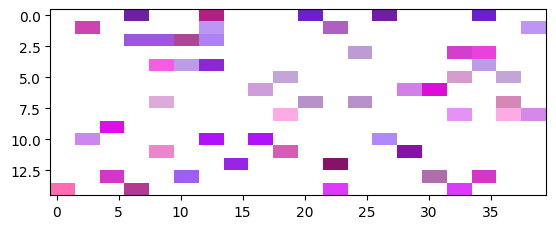

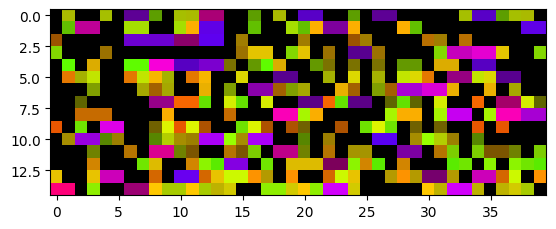

In [ ]:
display(final)
vis(final)

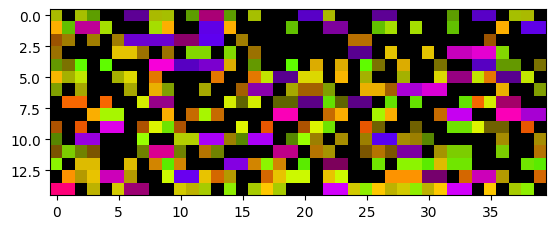

In [ ]:

vis(final)

In [ ]:
final=subs

In [ ]:
print(stli(final))
print(staff_intersection(final))
print(check_workhours(final))
print(check_sub(final))

30
100
13
35.25


In [ ]:
CalculateCost(subs)

157.5